# Import Libraries & load data

In [3]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

sns.set(color_codes = True)
%matplotlib inline 

In [4]:
customer = pd.read_csv('C:\\Users\\Bank_Personal_Loan_Modelling.csv')

# 1st Glance at data

In [5]:
customer.shape

(5000, 14)

In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
customer.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Lets explore data column wise 

1. Column "Experience" has some negative value. 
2. Binary variables : "Personal Loan", "CreditCard", "Online", "CD Account", "Securities Account"
3. Ordinary Categorical variables "Family" and "Education" are clean 

In [6]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Experience variable has negative values in 52 records, which could possibly mean some error in data. Hence let us replace those values with the absolute values as it could have been a typing error. Here we are not taking the mean value into consideration because the mean of Experience column is 20 years.

In [8]:
customer[customer["Experience"] < 0 ]["Experience"].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [9]:
customer.Experience.mean()

20.1046

In [10]:
customer['Experience'] = customer["Experience"].abs()

In [11]:
customer[customer["Experience"] < 0 ]["Experience"].value_counts()

Series([], Name: Experience, dtype: int64)

In [12]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
customer.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Colinearity Anaysis
### AGE & Experience columns are showing +ve (.99) colinearlity. Hence AGE & Experience shall not be analyzed together. Mrtgage, Income & Education columns have skewness


In [14]:
customer.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


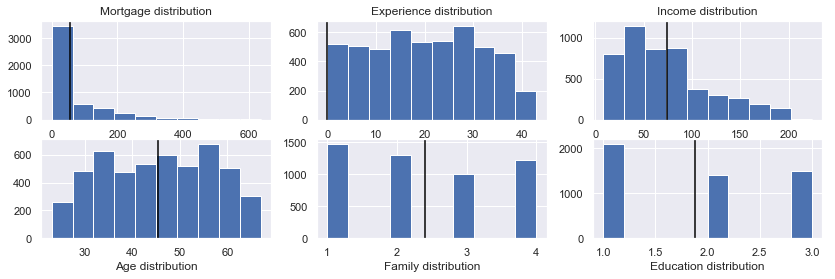

In [15]:
fig, [[ax0, ax1, ax2],[ax3,ax4,ax5]] = plt.subplots(2,3, figsize = (14,4))

ax0.hist(customer.Mortgage)
ax0.axvline(customer.Mortgage.mean(), color = "black")
ax0.set_title('Mortgage distribution')

ax1.hist(customer.Experience)
ax1.axvline(0, color = "black");
ax1.set_title('Experience distribution')

ax2.hist(customer.Income)
ax2.axvline(customer.Income.mean(), color = "black");
ax2.set_title('Income distribution')


ax3.hist(customer.Age)
ax3.set_xlabel('Age distribution')
ax3.axvline(customer.Age.mean(), color = "black");


ax4.hist(customer.Family)
ax4.set_xlabel('Family distribution')
ax4.axvline(customer.Family.mean(), color = "black");

ax5.hist(customer.Education)
ax5.set_xlabel('Education distribution')
ax5.axvline(customer.Education.mean(), color = "black");


## Feature-Class Relationships
The next important relationship to explore is that of each attribute to the class attribute(Personal Loan).

Personal Loan
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

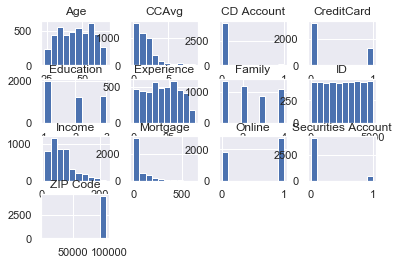

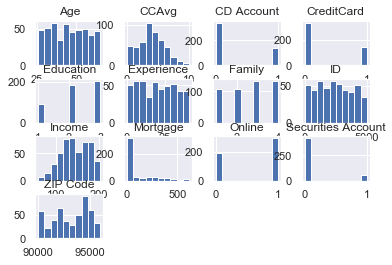

In [16]:
customer.groupby('Personal Loan').hist()

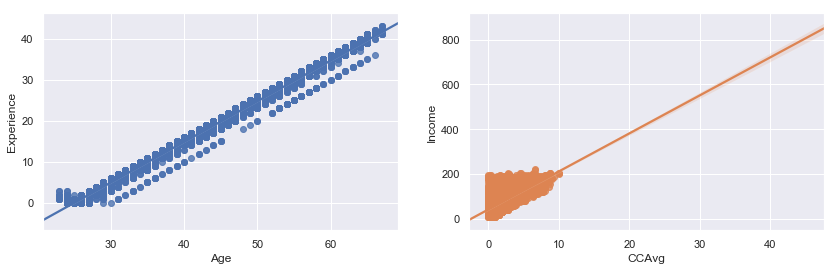

In [17]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
sns.regplot(customer["Age"],customer["Experience"],ax=axes[0])
sns.regplot(customer["CCAvg"],customer["Income"],ax=axes[1])


# Quick learning so far !!!
1. Age and Experience are highly correlated
2. Personal Loan has maximum correlation with : (Income, CCAvg, CD Account, Mortgage and Education)
3. CD Account is again dependent on Credit Card, Securities Account, Online, CCAvg and Income
4. Mortgage has moderate correlation with Income.
5. Income influences CCAvg, Personal Loan, Mortgage, CD Account.

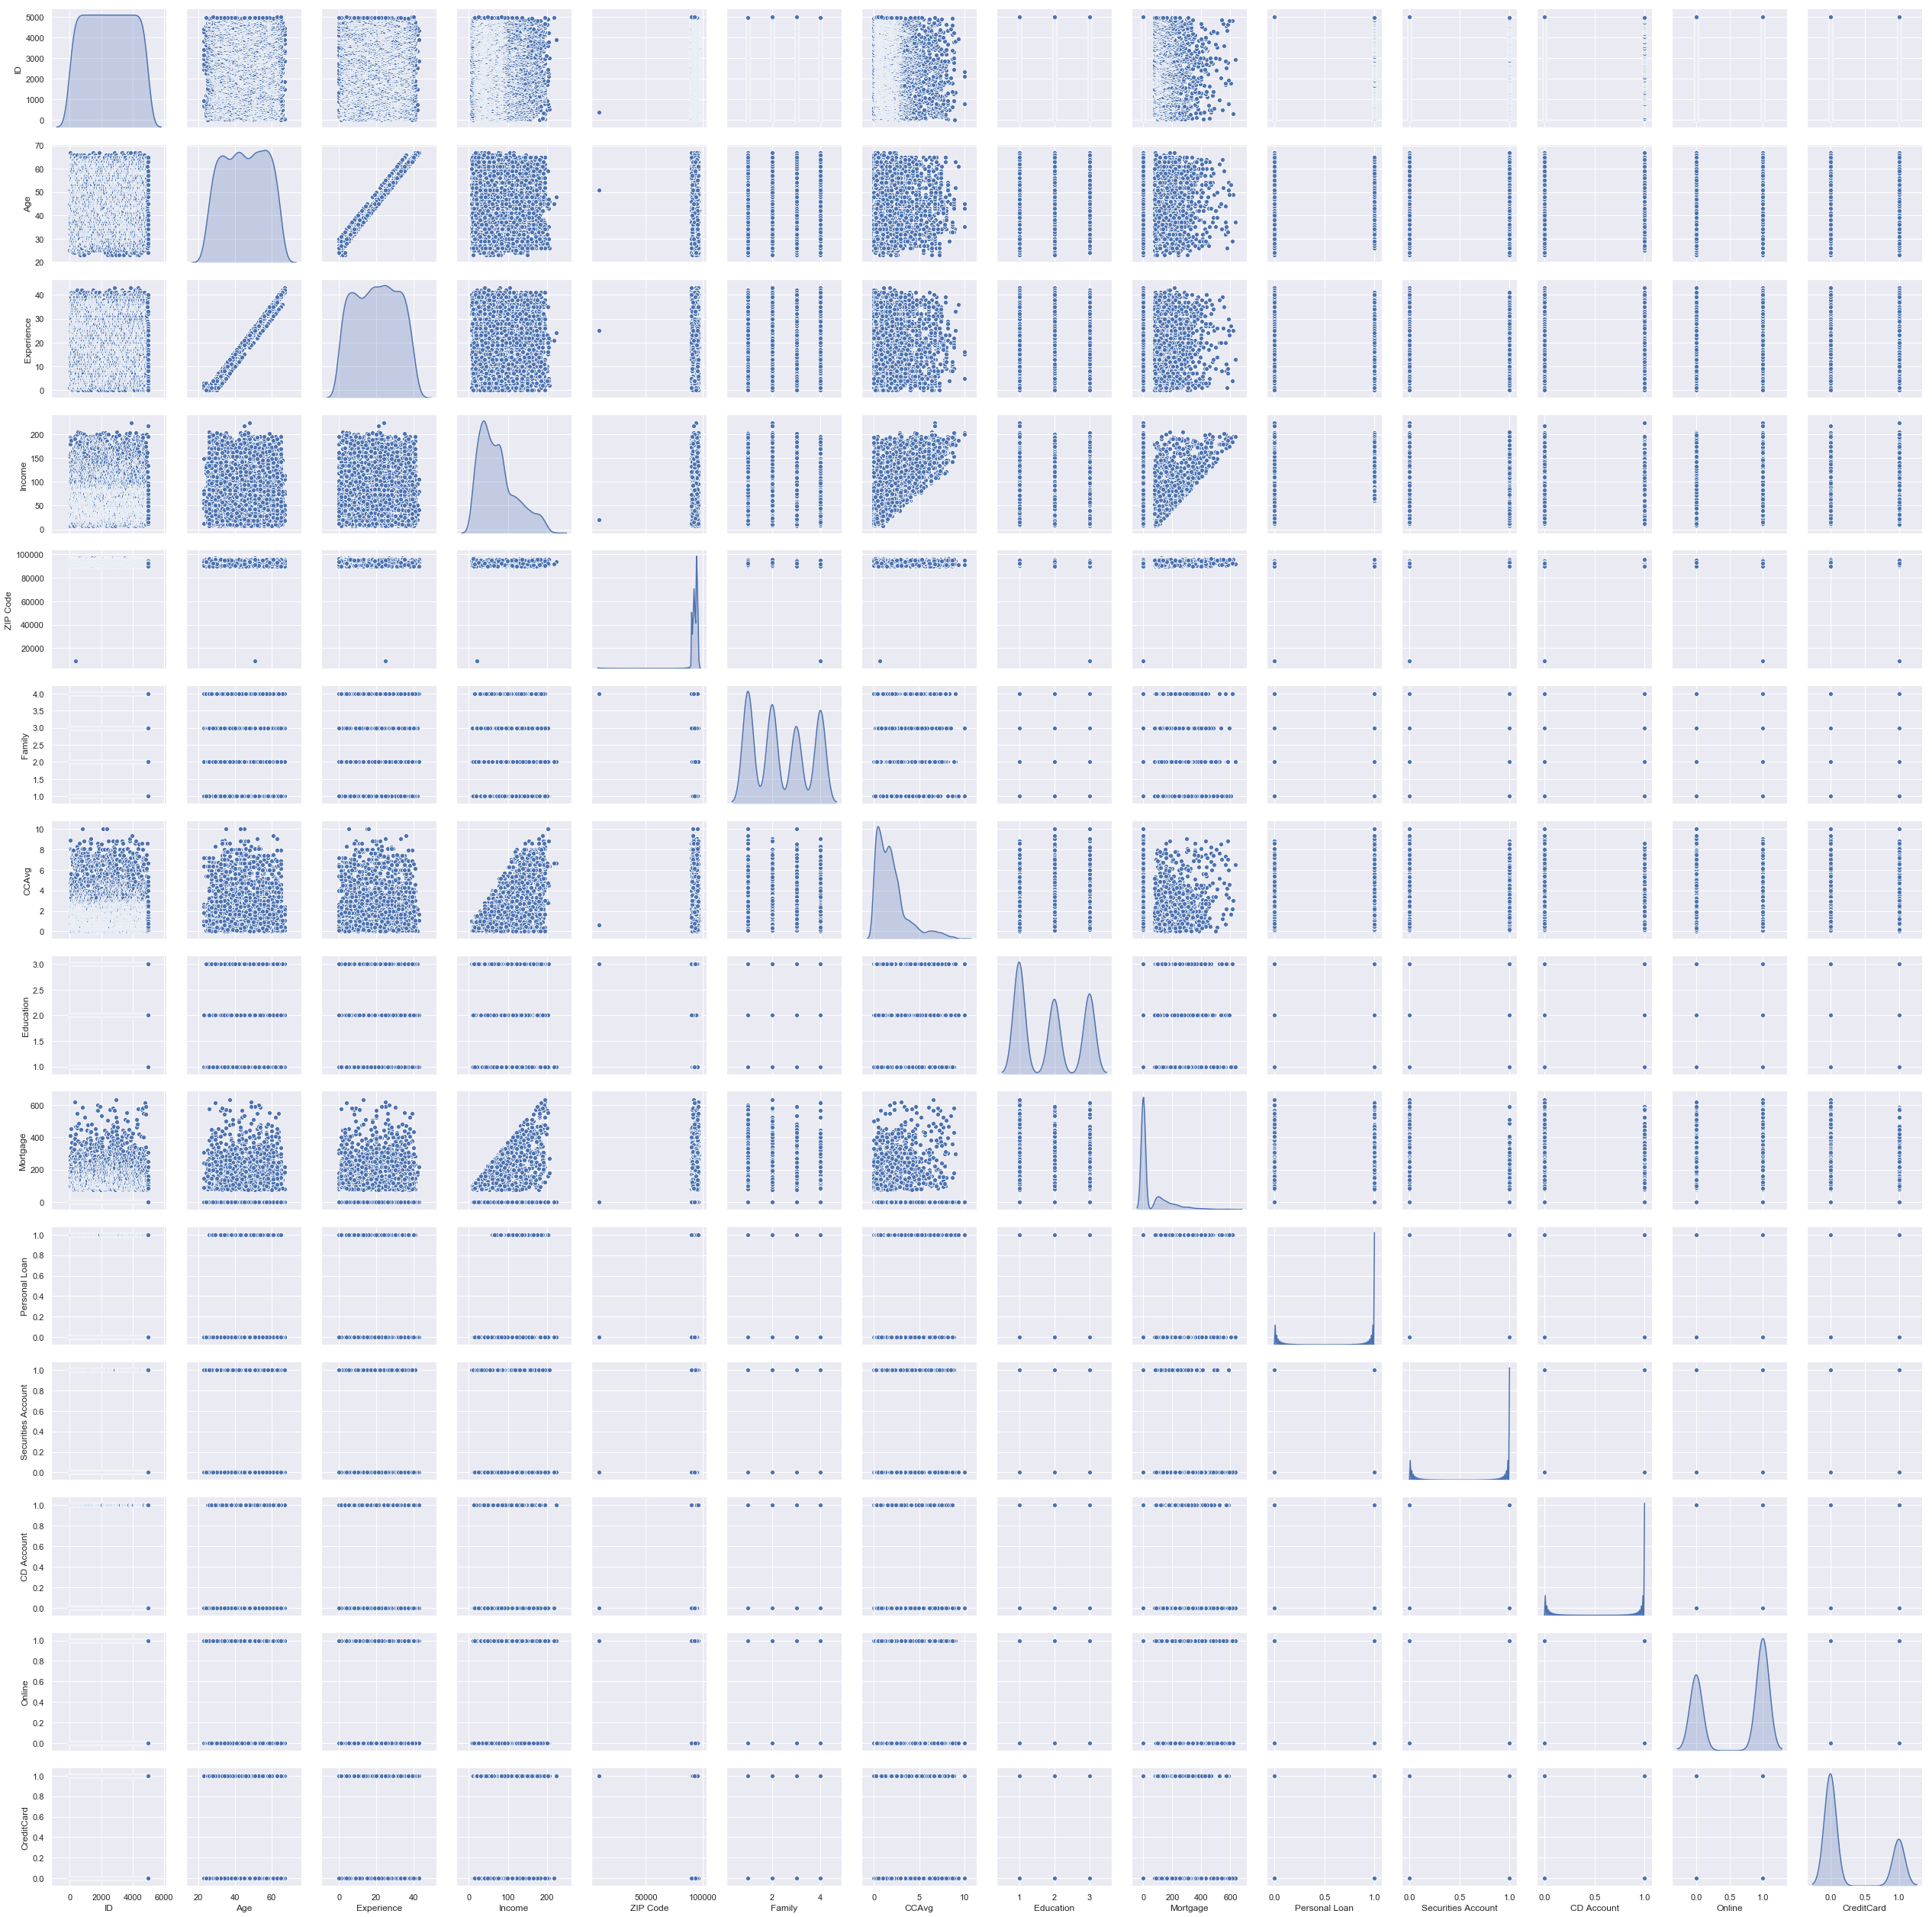

In [18]:
sns.pairplot(customer,diag_kind='kde')

# Lets do CORRELATION more : Age, Income, CCAvg & Mortgage

In [19]:
quant_df = customer[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()
quant_df.corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


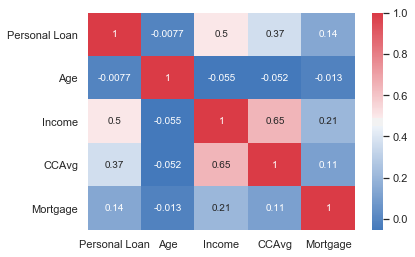

In [20]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(quant_df.corr(), cmap = cmap, annot = True);

Personal Loan has strong association with CCAvg & Income columns

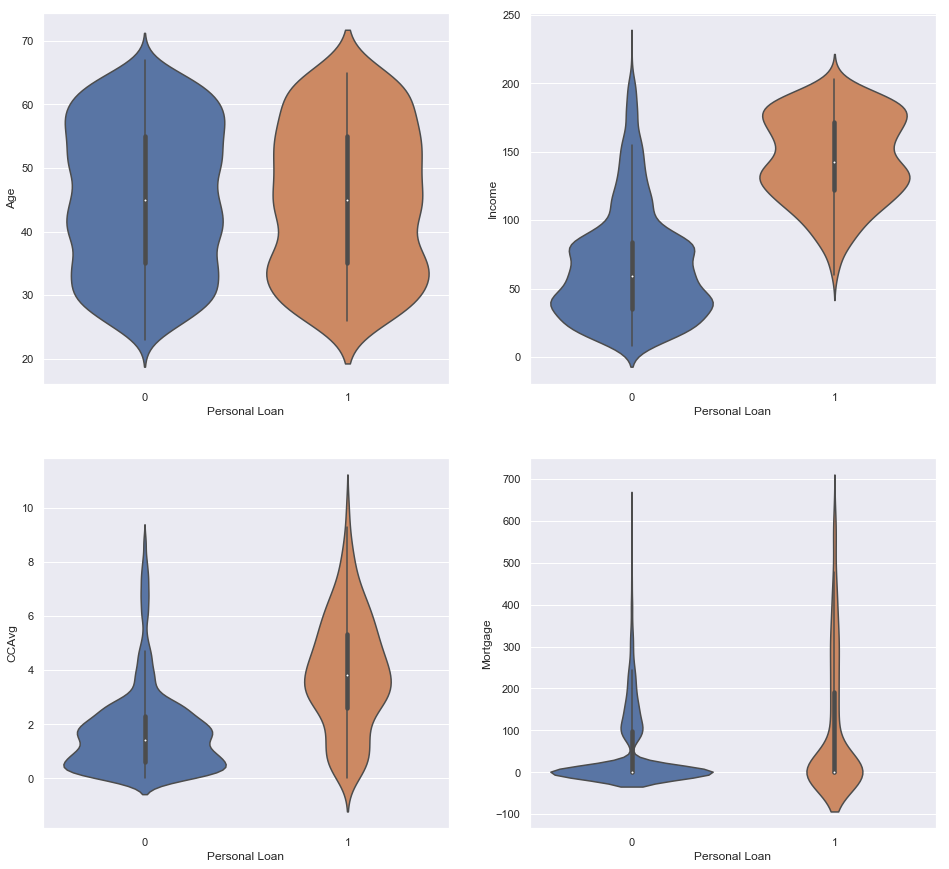

In [21]:
fig, axes = plt.subplots(2,2, figsize = (16,15))
sns.violinplot(quant_df["Personal Loan"],quant_df["Age"],ax=axes[0,0])
sns.violinplot(quant_df["Personal Loan"],quant_df["Income"],ax=axes[0,1])
sns.violinplot(quant_df["Personal Loan"],quant_df["CCAvg"],ax=axes[1,0])
sns.violinplot(quant_df["Personal Loan"],quant_df["Mortgage"],ax=axes[1,1])



### Personal Loan correlation with Age, Income, CCAvg, Mortgage 

In [23]:
quant_df.corr()['Personal Loan'][1:]

Age        -0.007726
Income      0.502462
CCAvg       0.366889
Mortgage    0.142095
Name: Personal Loan, dtype: float64

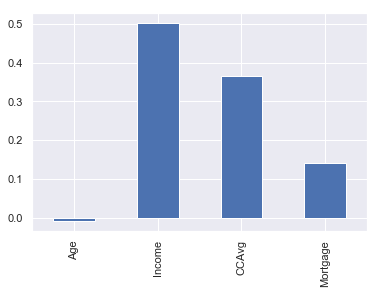

In [24]:
quant_df.corr()['Personal Loan'][1:].plot.bar();

# Target column: PERSONAL LOAN distribution anaylsis. 
Data is having a huge bias (almost 1:10) towards the category of people not accepting the personal loan.Hence we can form opinion that our model will tend to perform better towards predicting which customers wont accept the personal loan.However, our problem is to identify the customers that can accept personal loan based on the selected available features. Unfair !!!

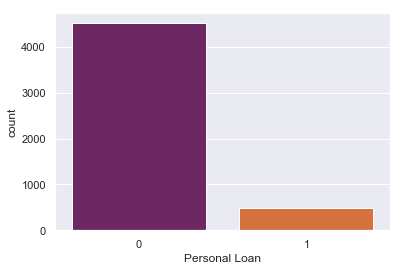

In [25]:
sns.countplot("Personal Loan",data=customer,palette='inferno')

In [26]:
n_true = len(customer.loc[customer['Personal Loan'] == 1])
n_false = len(customer.loc[customer['Personal Loan'] == 0])
print("% of Personal Loan takers: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("% of Personal Loan non-takers: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

% of Personal Loan takers: 480 (9.60%)
% of Personal Loan non-takers: 4520 (90.40%)


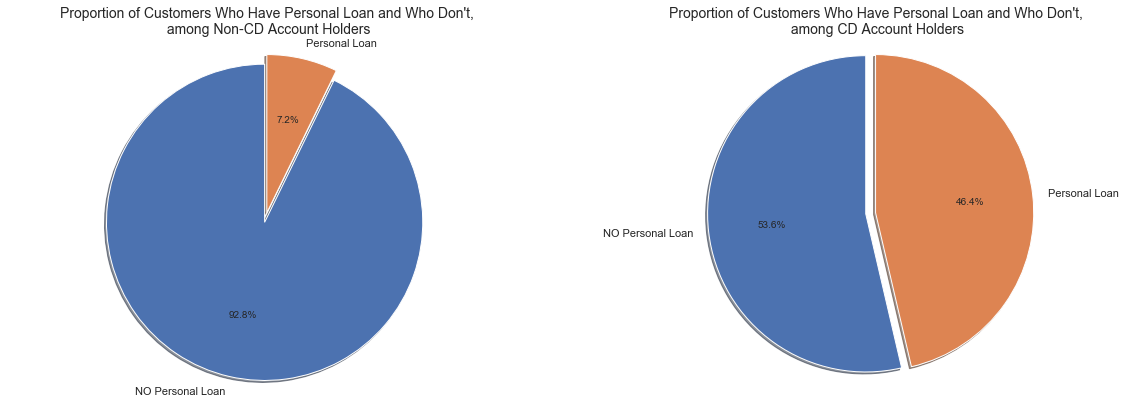

In [27]:
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1], aspect=1)
series = customer[customer['CD Account'] == 1]['Personal Loan'].value_counts()
plt.axis('equal')
plt.title('Proportion of Customers Who Have Personal Loan and Who Don\'t,\n among CD Account Holders', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(series, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0.1, 0), radius = 1.6, startangle = 90)
plt.savefig('Proportion_of_loanees_among_depositees.png', bbox_inches = 'tight');

plt.subplot(the_grid[0, 0], aspect=1)
series = customer[customer['CD Account'] == 0]['Personal Loan'].value_counts()
plt.axis('equal')
plt.title('Proportion of Customers Who Have Personal Loan and Who Don\'t,\n among Non-CD Account Holders', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(series, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0.1, 0), radius = 1.6, startangle = 90)
plt.savefig('Proportion_of_loanees_among_depositees.png', bbox_inches = 'tight');



In [28]:
n_true = len(customer.loc[customer['CD Account'] == 1])
n_false = len(customer.loc[customer['CD Account'] == 0])
print("% of CD Account Holders: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("% of CD Account Non-holders: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

% of CD Account Holders: 302 (6.04%)
% of CD Account Non-holders: 4698 (93.96%)


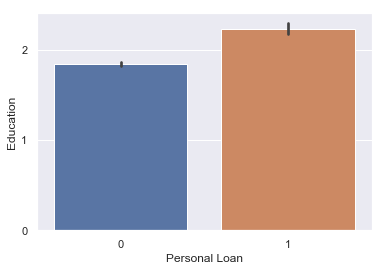

In [29]:
ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
sns.barplot(x="Personal Loan", y="Education",data=customer)

### The above & below charts shows relation of Education with personal loan.It seems that people with higher education(=2,3) tend to opt for Personal Loan more.

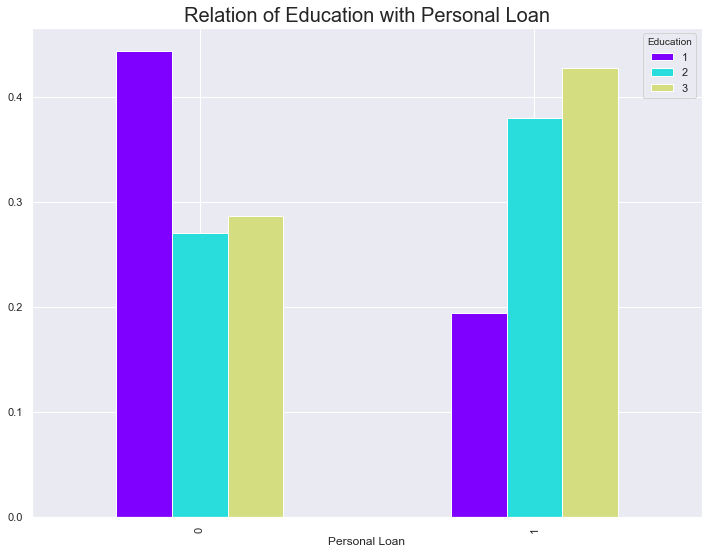

In [30]:
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(customer['Personal Loan'], customer['Education']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of Education with Personal Loan', fontsize = 20, fontweight = 30)
plt.show()

### There is a clear difference in the relationship between Income and Personal loans. People belonging to Higher Salary bracket majorly consume Personal Loan 

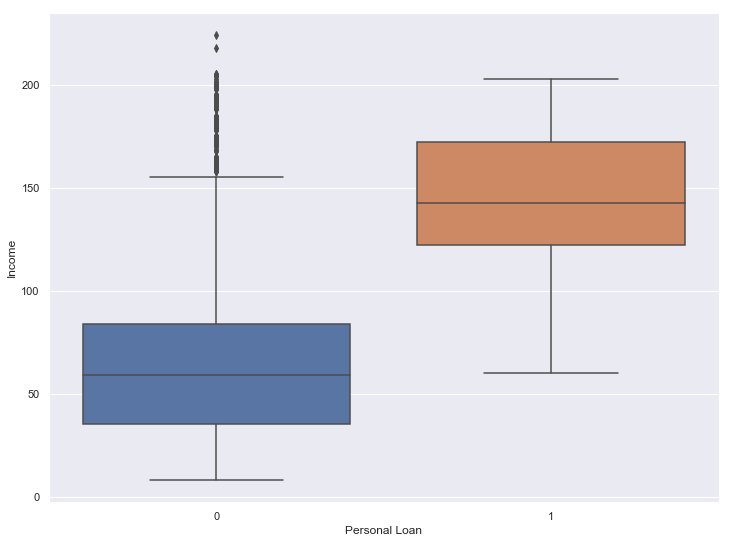

In [31]:
sns.boxplot(x="Personal Loan", y="Income",data=customer)

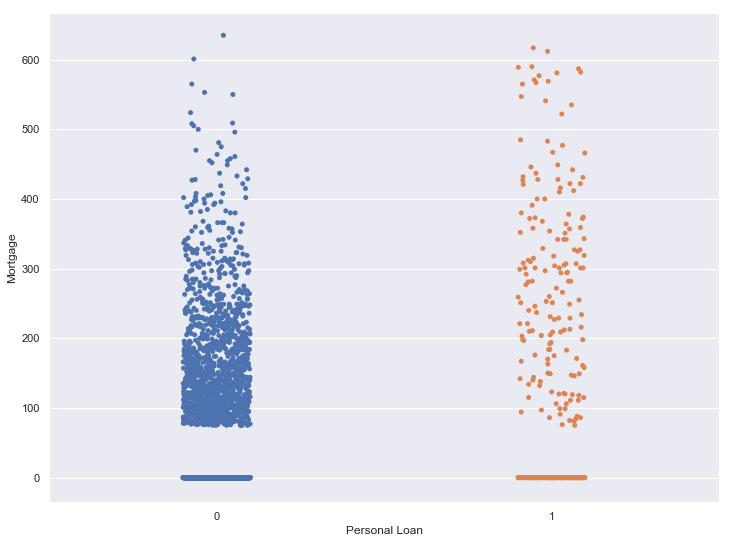

In [32]:
sns.stripplot(x="Personal Loan", y="Mortgage",data=customer)

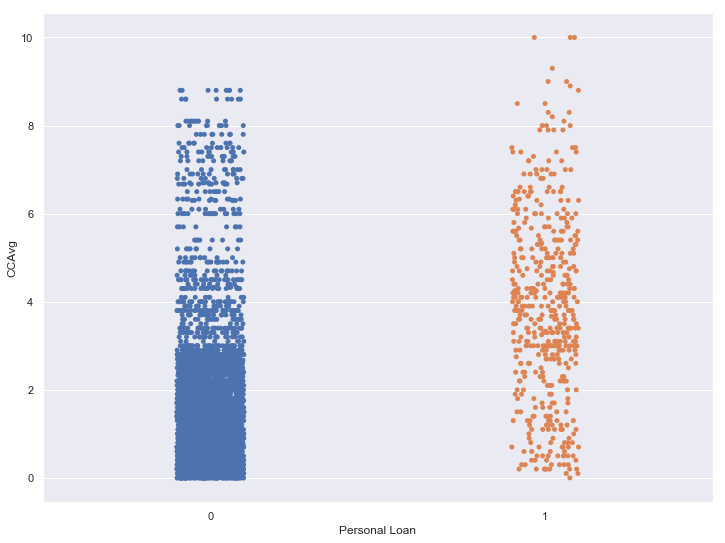

In [33]:
    sns.stripplot(x="Personal Loan", y="CCAvg",data=customer)

### Below pie chart shows distribution of personal loan, securities account, CD account, online, and credit card. Personal loan will be target of classification.So it's unbalance dataset.

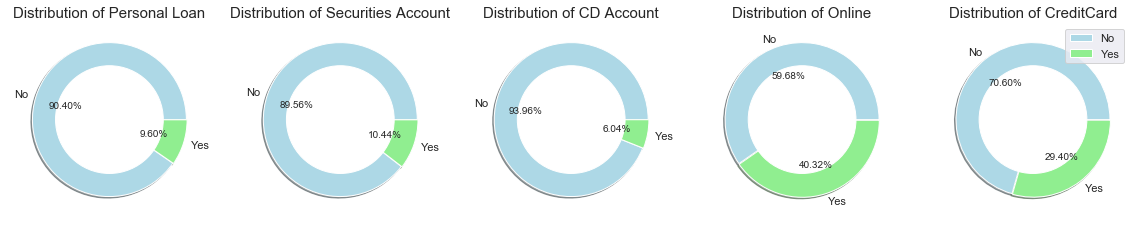

In [34]:
# plotting a donut chart for visualizing 'Personal Loan','Securities Account','CD Account','Online','CreditCard'

fig, ax = plt.subplots(1,5,figsize=(20,20))
columns = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']

for i,column in enumerate(columns):
    plt.subplot(1,5,i+1)
    size = customer[column].value_counts()
    colors = ['lightblue', 'lightgreen']
    labels = "No", "Yes"
    explode = [0, 0.01]

    my_circle = plt.Circle((0, 0), 0.7, color = 'white')

    plt.rcParams['figure.figsize'] = (20, 20)
    plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
    plt.title('Distribution of {}'.format(column), fontsize = 15)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
plt.legend()
plt.show()

## Explolatory Data Anaysis : Summary
Customers with undergraduate level of education and family > 3 are good prospective customers.
People opting for the loan have the same income range irrespective of the education level.
For Graduate Level and above Education of customers, family size doesnt play a major role in classification.
Graduates and Post graduates have a better chance of becoming customers even if they dont have any experience.
Also, to be noted, is that People with Under graduation have the maximum income range
Education of Graduate and above have more chances of taking the personal loan.
Customers with personal loan also have a higher CCAvg spends.
Customers with income > 100K tend to accept personal loans.
Customers with Higher CCAvg tend to accept personal loans.

## Drop ID & Experience variables

Since ID doesn't have any effect on the data let's drop it. 
Since AGE & Experience are co-related lets drop Experience variable from X.

#### X ==> Set of Independent Variables

#### y ==> Dependent Variable

In [36]:
X=customer.drop(['Personal Loan','ID','Experience'],axis=1)
y=customer['Personal Loan']
print(X.columns)

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')


## Split data into ratio of 70:30 (training:testing) set
To check the effect of scaling on the dataset, let us create another set of data with scaling function applied to it.

#### X_train, X_test, y_train, y_test ==> Unscaled Split

#### ZX_train, ZX_test, y_train, y_test ==> Scaled Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)


C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


# MODEL BUILDING - LOGISTIC REGRESSION

In [65]:
## Logistic Regression on non-scaler cols

logRegA = LogisticRegression(solver='liblinear')
logRegA.fit(X_train,y_train)
y_test1A_predict = logRegA.predict(X_test)

## Logistic Regression on scaler cols

logRegB = LogisticRegression(solver='liblinear')
logRegB.fit(ZX_train,y_train)
y_test1B_predict = logRegB.predict(ZX_test)

model1A_score=metrics.accuracy_score(y_test, y_test1A_predict)
model1B_score=metrics.accuracy_score(y_test, y_test1B_predict)

#Calculate the coefficients of logistic regression model (non-scaler)
t = list(X_train.columns)
coef_df = pd.DataFrame(logRegA.coef_, columns= t)
coef_df['intercept'] = logRegA.intercept_

print()
print('##  Non-scaler columns ###')
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, logRegA.coef_[0][idx]))
print()
print("The intercept for our model is {}".format(logRegA.intercept_[0]))

print()
print('##  Scaler columns ###')
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, logRegB.coef_[0][idx]))
print()
print("The intercept for our model is {}".format(logRegB.intercept_[0]))
print()
print()

cm = metrics.confusion_matrix(y_test,y_test1B_predict)
cf = metrics.classification_report(y_test,y_test1B_predict)
print('+++++++++++++++++++++++++++++++++')
print('SCALED Classification Report')
print('+++++++++++++++++++++++++++++++++')
print(cf)


cf = metrics.classification_report(y_test,y_test1B_predict)
print()
print('+++++++++++++++++++++++++++++++++')
print('Non-SCALED Classification Report')
print('+++++++++++++++++++++++++++++++++')
print(metrics.classification_report(y_test,y_test1A_predict))


print(cm)



##  Non-scaler columns ###
The coefficient for Age is 0.007155401433669997
The coefficient for Income is 0.0375566216671967
The coefficient for ZIP Code is -7.056144320949279e-05
The coefficient for Family is 0.015505088409851871
The coefficient for CCAvg is 0.005647163456361847
The coefficient for Education is 0.01825718142001143
The coefficient for Mortgage is 0.000536976515616263
The coefficient for Securities Account is 0.0011442481016278871
The coefficient for CD Account is 0.00490283554437564
The coefficient for Online is -0.0005170768277063041
The coefficient for CreditCard is -0.0001335200748767017

The intercept for our model is -8.412631380712498e-05

##  Scaler columns ###
The coefficient for Age is 0.0910972532798429
The coefficient for Income is 2.4381295034784376
The coefficient for ZIP Code is -0.026360397067501914
The coefficient for Family is 0.7580308564719739
The coefficient for CCAvg is 0.18139352650985868
The coefficient for Education is 1.3389206488019594
The coe

### Linear Regression Model accuracy : Non-scaler ==> 0.8993 & Scaler ==> 0.9527
### Scaling has imporved Precision for Personal Loan (Class=1) from 45% to 81%

# MODEL BUILDING - NAIVE BAYES

In [46]:
#+++++++++++++++++++++++++++++++++
# Naive Bayes Classification
#+++++++++++++++++++++++++++++++++

gauss_modelA = GaussianNB()
gauss_modelA.fit(X_train, y_train)
y_test2A_predict = gauss_modelA.predict(X_test)

gauss_modelB = GaussianNB()
gauss_modelB.fit(ZX_train, y_train)
y_test2B_predict = gauss_modelB.predict(ZX_test)

model2A_score=metrics.accuracy_score(y_test, y_test2A_predict)
model2B_score=metrics.accuracy_score(y_test, y_test2B_predict)

print(metrics.confusion_matrix(y_test, y_test2B_predict))

print('+++++++++++++++++++++++++++++++++')
print('SCALED Classification Report')
print('+++++++++++++++++++++++++++++++++')
print(metrics.classification_report(y_test, y_test2B_predict))


print()
print('+++++++++++++++++++++++++++++++++')
print('Non-SCALED Classification Report')
print('+++++++++++++++++++++++++++++++++')
print(metrics.classification_report(y_test,y_test2A_predict))


[[1234  126]
 [  56   84]]
+++++++++++++++++++++++++++++++++
SCALED Classification Report
+++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500


+++++++++++++++++++++++++++++++++
Non-SCALED Classification Report
+++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1360
           1       0.42      0.61      0.50       140

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



### NAIVE BAYES Model accuracy : Non-scaler ==> 0.8860 & Scaler ==> 0.8787
### Scaling has not much positive impact on Precision for Personal Loan (Class=1) from 42% to 40%

# MODEL BUILDING - k-Nearest Neighbors (KNN)

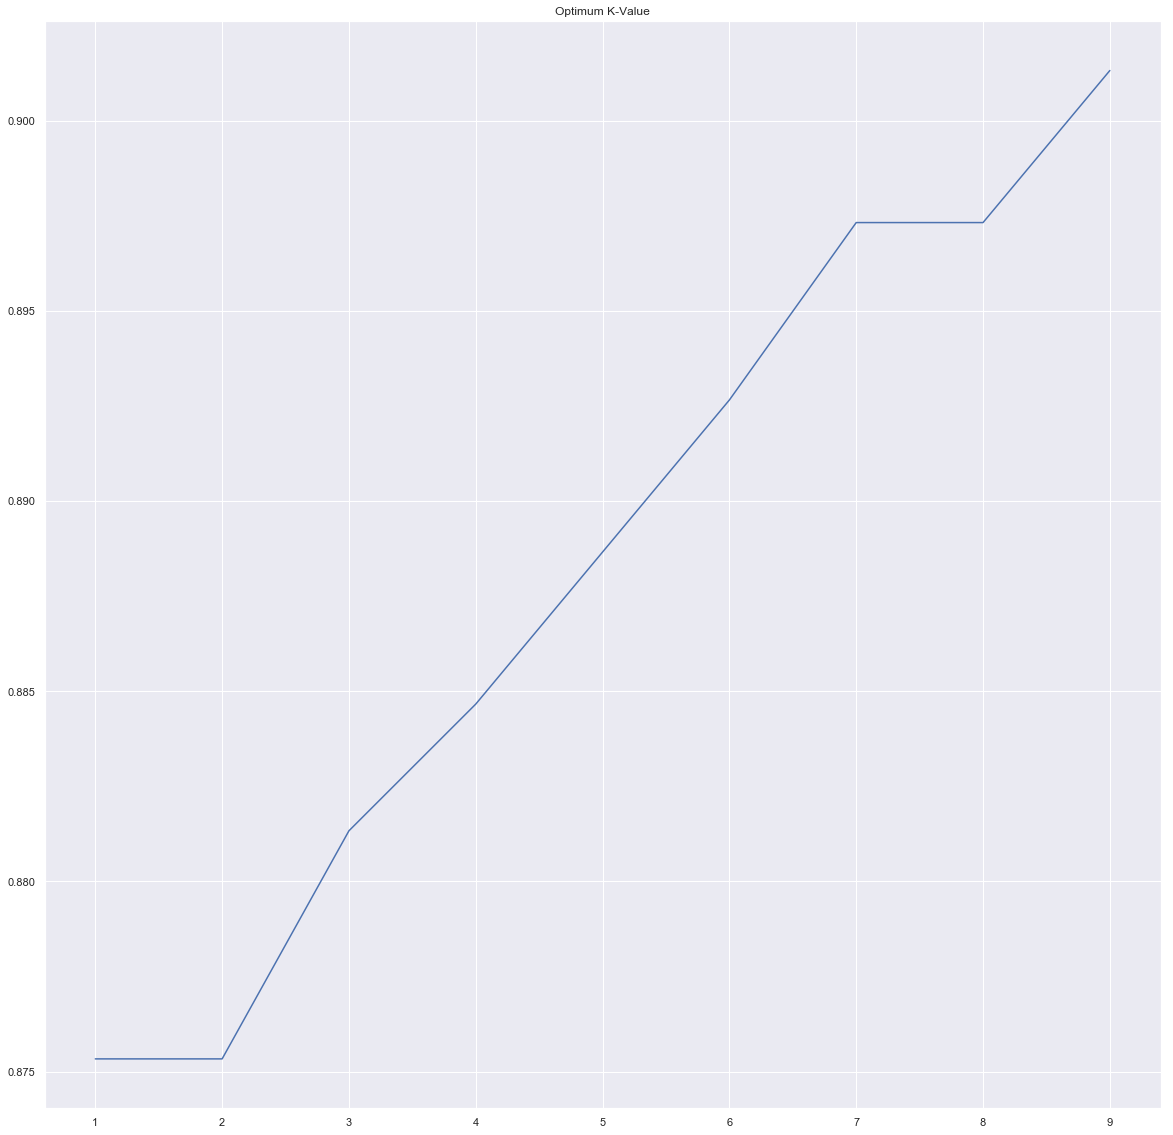

+++++++++++++++++++++++++++++++++
SCALED Classification Report
+++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1360
           1       0.95      0.60      0.74       140

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.96      0.80      0.86      1500
weighted avg       0.96      0.96      0.96      1500


+++++++++++++++++++++++++++++++++
Non-SCALED Classification Report
+++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1360
           1       0.45      0.24      0.31       140

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.69      0.60      0.63      1500
weighted avg       0.88      0.90      0.89      1500




In [50]:
#===========================
#Choosing optimal K-Value
#===========================
scores=[]
for k in range(1,10):
 NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
 NNH.fit(X_train, y_train)
 scores.append(NNH.score(X_test, y_test))
plt.plot(range(1,10),scores)
plt.title('Optimum K-Value')
plt.show()

## k=9 seems to be the best fit

NNHA = KNeighborsClassifier(n_neighbors=9 , weights = 'distance' )
NNHA.fit(X_train, y_train)
y_test3A_predict = NNHA.predict(X_test)

NNHB = KNeighborsClassifier(n_neighbors=9 , weights = 'distance' )
NNHB.fit(ZX_train, y_train)
y_test3B_predict = NNHB.predict(ZX_test)

model3A_score=metrics.accuracy_score(y_test, y_test3A_predict)
model3B_score=metrics.accuracy_score(y_test, y_test3B_predict)

print('+++++++++++++++++++++++++++++++++')
print('SCALED Classification Report')
print('+++++++++++++++++++++++++++++++++')
print(metrics.classification_report(y_test, y_test3B_predict))


print()
print('+++++++++++++++++++++++++++++++++')
print('Non-SCALED Classification Report')
print('+++++++++++++++++++++++++++++++++')
print(metrics.classification_report(y_test,y_test3A_predict))

print()




### KNN Model accuracy : Non-scaler ==> 0.901 & Scaler ==> 0.96
### Scaling has imporved Precision for Personal Loan (Class=1) from 45% to 95%

# COMPARISON OF MODELS : ROC & AUC plots

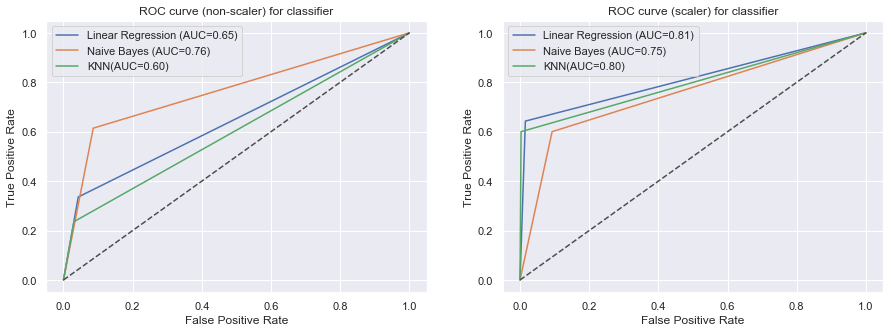

In [67]:
#+++++++++++++++++++++++++++++++++
##  PLOT ROC
#+++++++++++++++++++++++++++++++++
# show ROC curve


auc1A = roc_auc_score(y_test, y_test1A_predict)
auc2A = roc_auc_score(y_test, y_test2A_predict)
auc3A = roc_auc_score(y_test, y_test3A_predict)

auc1B = roc_auc_score(y_test, y_test1B_predict)
auc2B = roc_auc_score(y_test, y_test2B_predict)
auc3B = roc_auc_score(y_test, y_test3B_predict)

#Accuracy_Before_Scaling = {'Logistic Regression': model1A_score, 'Naive Bayes': model2A_score, 'K-Nearest Neighbors': model3A_score}
#Accuracy_After_Scaling = {'Logistic Regression': model1B_score, 'Naive Bayes': model2B_score, 'K-Nearest Neighbors': model3B_score}

#print('Overall Model Accuracy before scaling:')
#print (Accuracy_Before_Scaling)
#print('\n')
#print('Overall Model Accuracy After scaling:')
#print (Accuracy_After_Scaling)

#print()
#print()
#print('AUC Scores (non-scaler): Linear Regression:  %.2f' %auc1A,', Naive Bayes: %.2f' %auc2A,' ,KNN: %.2f' %auc3A)
#print('AUC Scores (scaler): Linear Regression:  %.2f' %auc1B,', Naive Bayes: %.2f' %auc2B,' ,KNN: %.2f' %auc3B)

fpr1A, tpr1A, thresholds1A = roc_curve(y_test, y_test1A_predict)
fpr2A, tpr2A, thresholds2A = roc_curve(y_test, y_test2A_predict)
fpr3A, tpr3A, thresholds3A = roc_curve(y_test, y_test3A_predict)

fpr1B, tpr1B, thresholds1B = roc_curve(y_test, y_test1B_predict)
fpr2B, tpr2B, thresholds2B = roc_curve(y_test, y_test2B_predict)
fpr3B, tpr3B, thresholds3B = roc_curve(y_test, y_test3B_predict)


fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.violinplot(quant_df["Personal Loan"],quant_df["Age"],ax=axes[0,0])

## AUC curve -- non-scaler
#fig, ax = plt.subplots()
#ax.subplot(1,0)
ax[0].plot(fpr1A, tpr1A,label='Linear Regression (AUC=%.2f)'%auc1A)
ax[0].plot(fpr2A, tpr2A,label='Naive Bayes (AUC=%.2f)'%auc2A)
ax[0].plot(fpr3A, tpr3A,label='KNN(AUC=%.2f)'%auc3A) 
ax[0].plot([0, 1], [0, 1],ls="--", c=".3")
ax[0].set_title('ROC curve (non-scaler) for classifier', fontweight = 30)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend()

## AUC curve -- Scaler
ax[1].plot(fpr1B, tpr1B,label='Linear Regression (AUC=%.2f)'%auc1B)
ax[1].plot(fpr2B, tpr2B,label='Naive Bayes (AUC=%.2f)'%auc2B)
ax[1].plot(fpr3B, tpr3B,label='KNN(AUC=%.2f)'%auc3B) 
ax[1].plot([0, 1], [0, 1], ls="--", c=".3")
ax[1].set_title('ROC curve (scaler) for classifier', fontweight = 30)
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend()


In [66]:
LinRegg_Gini=2*auc1A - 1
NavBay_Gini=2*auc2A - 1
KNN_Gini=2*auc3A - 1

LinRegg_Gini_S=2*auc1B - 1
NavBay_Gini_S=2*auc2B - 1
KNN_Gini_S=2*auc3B - 1

Compare = [[model1A_score,LinRegg_Gini,auc1A],
           [model2A_score,NavBay_Gini,auc2A],
           [model3A_score,KNN_Gini,auc3A],
           [model1B_score,LinRegg_Gini_S,auc1B],
           [model2B_score,NavBay_Gini_S,auc2B],
           [model3B_score,KNN_Gini_S,auc3B],
          ]

print('++++++++++++++++++++++++++++++++++')
print('         Model Comparison         ')
print('++++++++++++++++++++++++++++++++++')
Compare_Models = pd.DataFrame(Compare, columns= ['Accuracy','Gini Index', 'AUC'], 
                                  index=['Logistic','Naive','KNN',
                                         'Logistic_Scaled','Naive_Scaled','KNN_Scaled'])
Compare_Models



++++++++++++++++++++++++++++++++++
         Model Comparison         
++++++++++++++++++++++++++++++++++


,Accuracy,Gini Index,AUC
Logistic,0.899333,0.293067,0.646534
Naive,0.886000,0.528256,0.764128
KNN,0.901333,0.205567,0.602784
Logistic_Scaled,0.952667,0.627416,0.813708
Naive_Scaled,0.878667,0.507353,0.753676
KNN_Scaled,0.960000,0.597059,0.798529


# Lets join all the dots !!!!!

# Project Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Project Objective Conclusion

### Overall Model Accuracy before scaling:
{'Logistic Regression': 0.8993333333333333, 'Naive Bayes': 0.886, 'K-Nearest Neighbors': 0.9013333333333333}

### Overall Model Accuracy After scaling:
{'Logistic Regression': 0.9526666666666667, 'Naive Bayes': 0.8786666666666667, 'K-Nearest Neighbors': 0.96}

# Moral of the story :-)
 Class 0 (Not opted for Personal Loan) has MORE probability than Class 1 so model will predict more about Class 0

### ****** Linear Regression is the winner here !!!    ************